## Jesus Rodrigo Colina Nunez
## Student Number 2017156
## MSC_DA_CA2

In [2]:
#pip install plotly # Here we are installing plotly in case we do not have it

In [67]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import poisson
from scipy.stats import binom

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from scipy.stats import norm

from statsmodels.tools.eval_measures import mse, rmse

import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [68]:
#!pip install xlrd 

#In order to read xlrd files

In [87]:
# Load Files

df_DublinLuas = pd.read_csv('LuasPassengerNumbers.csv') 

df_DublinLuas1 = pd.read_csv('PassengerJourneysbyLuas.csv') 

# Read an excel file
df_SubteBA1 = pd.read_excel('SubteBuenosAires.xlsx')
 




#### EDA - Dublin Luas data sets 

In [88]:
df_DublinLuas.head(100)  #We have a look of the first 100 rows

,STATISTIC,Statistic Label,TLIST(A1),Year,C01885V02316,Month,UNIT,VALUE
0,TOA11C01,Red line,2018,2018,01,January,Number,1664495
1,TOA11C01,Red line,2018,2018,02,February,Number,1657562
2,TOA11C01,Red line,2018,2018,03,March,Number,1661098
3,TOA11C01,Red line,2018,2018,04,April,Number,1794424
4,TOA11C01,Red line,2018,2018,05,May,Number,1934553
...,...,...,...,...,...,...,...,...
95,TOA11C02,Green line,2020,2020,05,May,Number,152570
96,TOA11C02,Green line,2020,2020,06,June,Number,350566
97,TOA11C02,Green line,2020,2020,07,July,Number,620358
98,TOA11C02,Green line,2020,2020,08,August,Number,698594


In [89]:
df_DublinLuas1.head(100) #We have a look of the first 100 rows

,STATISTIC,Statistic Label,TLIST(W1),Week,C03132V03784,Luas Line,UNIT,VALUE
0,TII03C01,Passenger Journeys,2019W01,2019 Week 01,-,All Luas lines,Number,549533.0
1,TII03C01,Passenger Journeys,2019W01,2019 Week 01,1,Red line,Number,274139.0
2,TII03C01,Passenger Journeys,2019W01,2019 Week 01,2,Green line,Number,275394.0
3,TII03C01,Passenger Journeys,2019W02,2019 Week 02,-,All Luas lines,Number,839022.0
4,TII03C01,Passenger Journeys,2019W02,2019 Week 02,1,Red line,Number,408199.0
...,...,...,...,...,...,...,...,...
95,TII03C01,Passenger Journeys,2019W32,2019 Week 32,2,Green line,Number,384389.0
96,TII03C01,Passenger Journeys,2019W33,2019 Week 33,-,All Luas lines,Number,868677.0
97,TII03C01,Passenger Journeys,2019W33,2019 Week 33,1,Red line,Number,445915.0
98,TII03C01,Passenger Journeys,2019W33,2019 Week 33,2,Green line,Number,422762.0


In [90]:
# Basic Information
#Here we check the size of the dataset How many columns and rows

#LuasPassengerNumbers

basic_info_1 = df_DublinLuas.info()


#This dataset has 195 entries and 8 columns. There are no missing values.

# Descriptive Statistics
desc_stats_1 = df_DublinLuas.describe()


# Missing values
missing_values_1 = df_DublinLuas.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATISTIC        195 non-null    object
 1   Statistic Label  195 non-null    object
 2   TLIST(A1)        195 non-null    int64 
 3   Year             195 non-null    int64 
 4   C01885V02316     195 non-null    object
 5   Month            195 non-null    object
 6   UNIT             195 non-null    object
 7   VALUE            195 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 12.3+ KB


In [91]:
# PassengerJourneysbyLuas


basic_info_2 = df_DublinLuas1.info()

#This dataset has 780 rows and 8 columns. There are 9 missing values in the 'VALUE' column.

desc_stats_2 = df_DublinLuas1.describe()

missing_values_2 = df_DublinLuas1.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        780 non-null    object 
 1   Statistic Label  780 non-null    object 
 2   TLIST(W1)        780 non-null    object 
 3   Week             780 non-null    object 
 4   C03132V03784     780 non-null    object 
 5   Luas Line        780 non-null    object 
 6   UNIT             780 non-null    object 
 7   VALUE            771 non-null    float64
dtypes: float64(1), object(7)
memory usage: 48.9+ KB


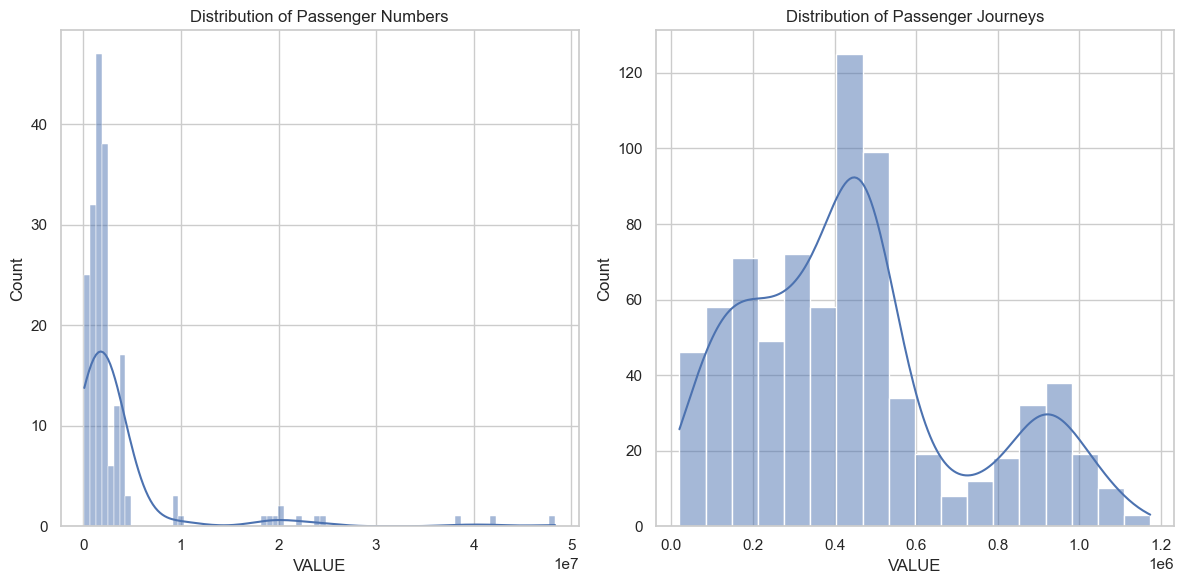

In [92]:

# I focus on 'VALUE' column for both datasets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_DublinLuas['VALUE'], kde=True)
plt.title('Distribution of Passenger Numbers')

plt.subplot(1, 2, 2)
sns.histplot(df_DublinLuas1['VALUE'], kde=True)
plt.title('Distribution of Passenger Journeys')

plt.tight_layout()
plt.show()


#Data Distribution: 
#The distribution of passenger journeys is skewed, indicating that some weeks have significantly higher or lower passenger counts than others.

### EDA - Data set Subway Buenos Aires Argentina 

In [93]:


df_SubteBA1.head(20)




,MES,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Enero,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0
2,Febrero,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0
3,Marzo,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0
4,Abril,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0
5,Mayo,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0
6,Junio,25613877,4435151.0,7396539.0,4974413.0,6505335.0,1871141.0,337630.0,93668.0
7,Julio,26056344,4460665.0,7683479.0,5014360.0,6708541.0,1757642.0,341509.0,90148.0
8,Agosto,27317442,4637966.0,7881651.0,5166576.0,7208916.0,1979066.0,353430.0,89837.0
9,Septiembre,27900595,4603717.0,8101275.0,5317462.0,7392462.0,2031498.0,362235.0,91946.0


The structure of this Excel file is not that bad but the columns need some rearrangement for clarity. .

So to start I will clean up the data by removing unnecessary rows and setting appropriate column headers. then I will sort the data by year and month. 



We also noticed that the names are in spanish, I will changed them to english but at a later steps. 



In [94]:
# Here I separeted the column Mes and Año because they were in the same column

df_SubteBA1['Año'] = df_SubteBA1['MES'].apply(lambda x: x if isinstance(x, int) else None)
df_SubteBA1['Mes'] = df_SubteBA1['MES'].apply(lambda x: x if isinstance(x, str) else None)

# Here I fill the year values that were mising 
df_SubteBA1['Año'].fillna(method='ffill', inplace=True)

df_SubteBA1.drop('MES', axis=1, inplace=True)

# Here we have and Idea of how our data set look like
df_SubteBA1.head()

,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro,Año,Mes
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2010.0,None
1,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0,2010.0,Enero
2,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0,2010.0,Febrero
3,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0,2010.0,Marzo
4,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0,2010.0,Abril


In [95]:
# We delete all the rows where the colum Mes is None 
df_SubteBA1 = df_SubteBA1.dropna(subset=['Mes'])

# Here we show our data set how it looks like
df_SubteBA1.head()

,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro,Año,Mes
1,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0,2010.0,Enero
2,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0,2010.0,Febrero
3,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0,2010.0,Marzo
4,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0,2010.0,Abril
5,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0,2010.0,Mayo


In [96]:
# Rearange the clumn names 
new_column_order = ['Año', 'Mes', 'TOTAL', 'LINEA A', 'LINEA B', 'LINEA C', 'LINEA D', 'LINEA E', 'LINEA H', 'Pemetro']
df_SubteBA1 = df_SubteBA1[new_column_order]

# Here we see how it looks like
df_SubteBA1.head()

,Año,Mes,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
1,2010.0,Enero,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0
2,2010.0,Febrero,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0
3,2010.0,Marzo,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0
4,2010.0,Abril,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0
5,2010.0,Mayo,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0


In [113]:
df_SubteBA1.info

# 166 rows x 10 columns

<bound method DataFrame.info of       Año         Mes     TOTAL    LINEA A    LINEA B    LINEA C    LINEA D  \
1    2010       Enero  18400465  3221968.0  5429265.0  3869637.0  4239486.0   
2    2010     Febrero  19063147  3335755.0  5547937.0  3776980.0  4736295.0   
3    2010       Marzo  25439123  4467167.0  7318728.0  4735548.0  6664063.0   
4    2010       Abril  24538311  4371793.0  6907448.0  4662661.0  6429258.0   
5    2010        Mayo  24577749  4254514.0  6887118.0  4758640.0  6437735.0   
..    ...         ...       ...        ...        ...        ...        ...   
175  2023       Junio  19480456  3611442.0  4818834.0  2719364.0  4624912.0   
176  2023       Julio  20353351  3818226.0  5041549.0  3098744.0  4680619.0   
177  2023      Agosto  21279617  3926598.0  5131106.0  3154456.0  4942118.0   
178  2023  Septiembre  21402837  3927178.0  5101320.0  3196849.0  4897334.0   
179  2023     Octubre  21312142  3917304.0  5073359.0  3197544.0  4868232.0   

       LINEA E    L

In [98]:
df_SubteBA1.dtypes

#We see the data types and we noticed that year and month need to be changed

Año        float64
Mes         object
TOTAL       object
LINEA A    float64
LINEA B    float64
LINEA C    float64
LINEA D    float64
LINEA E    float64
LINEA H    float64
Pemetro    float64
dtype: object

In [99]:
# Here I changed the colum year to integer and month to string
df_SubteBA1['Año'] = df_SubteBA1['Año'].astype(int)
df_SubteBA1['Mes'] = df_SubteBA1['Mes'].astype(str)



In [100]:
# Verify 
df_SubteBA1.dtypes

Año          int32
Mes         object
TOTAL       object
LINEA A    float64
LINEA B    float64
LINEA C    float64
LINEA D    float64
LINEA E    float64
LINEA H    float64
Pemetro    float64
dtype: object

In [101]:
df_SubteBA1.head()

,Año,Mes,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
1,2010,Enero,18400465,3221968.0,5429265.0,3869637.0,4239486.0,1299757.0,255146.0,85206.0
2,2010,Febrero,19063147,3335755.0,5547937.0,3776980.0,4736295.0,1349138.0,243586.0,73456.0
3,2010,Marzo,25439123,4467167.0,7318728.0,4735548.0,6664063.0,1859415.0,316007.0,78195.0
4,2010,Abril,24538311,4371793.0,6907448.0,4662661.0,6429258.0,1791520.0,301660.0,73971.0
5,2010,Mayo,24577749,4254514.0,6887118.0,4758640.0,6437735.0,1836516.0,312436.0,90790.0


In [102]:
# we save the changes to a new file in case we mesed up so we have copies of both files.

#output_file_path = 'C:/Users/AW/Desktop/CA2/SubteBuenosAires2.xlsx'

# save my modified dataset
#df_SubteBA1.to_excel(output_file_path, index=False)

In [103]:
df_SubteBA2 = pd.read_excel('SubteBuenosAires2.xlsx')

In [104]:
df_SubteBA2.head()

,Año,Mes,TOTAL,LINEA A,LINEA B,LINEA C,LINEA D,LINEA E,LINEA H,Pemetro
0,2010,Enero,18400465,3221968,5429265,3869637,4239486,1299757,255146,85206
1,2010,Febrero,19063147,3335755,5547937,3776980,4736295,1349138,243586,73456
2,2010,Marzo,25439123,4467167,7318728,4735548,6664063,1859415,316007,78195
3,2010,Abril,24538311,4371793,6907448,4662661,6429258,1791520,301660,73971
4,2010,Mayo,24577749,4254514,6887118,4758640,6437735,1836516,312436,90790


In [105]:
#Im going to change the names in English for better manipulation.

# Translate column names and month names to English
columns_translation = {
    "Año": "Year",
    "Mes": "Month",
    "TOTAL": "Total",
    "LINEA A": "Line A",
    "LINEA B": "Line B",
    "LINEA C": "Line C",
    "LINEA D": "Line D",
    "LINEA E": "Line E",
    "LINEA H": "Line H",
    "Pemetro": "Perimeter"
}

# Changing Spanish month names to English
months_translation = {
    "Enero": "January",
    "Febrero": "February",
    "Marzo": "March",
    "Abril": "April",
    "Mayo": "May",
    "Junio": "June",
    "Julio": "July",
    "Agosto": "August",
    "Septiembre": "September",
    "Octubre": "October",
    "Noviembre": "November",
    "Diciembre": "December"
}

# Apply the translations
df_SubteBA2.rename(columns=columns_translation, inplace=True)
df_SubteBA2["Month"] = df_SubteBA2["Month"].map(months_translation)


# Display the translated columns
df_SubteBA2.head(10)

,Year,Month,Total,Line A,Line B,Line C,Line D,Line E,Line H,Perimeter
0,2010,January,18400465,3221968,5429265,3869637,4239486,1299757,255146,85206
1,2010,February,19063147,3335755,5547937,3776980,4736295,1349138,243586,73456
2,2010,March,25439123,4467167,7318728,4735548,6664063,1859415,316007,78195
3,2010,April,24538311,4371793,6907448,4662661,6429258,1791520,301660,73971
4,2010,May,24577749,4254514,6887118,4758640,6437735,1836516,312436,90790
5,2010,June,25613877,4435151,7396539,4974413,6505335,1871141,337630,93668
6,2010,July,26056344,4460665,7683479,5014360,6708541,1757642,341509,90148
7,2010,August,27317442,4637966,7881651,5166576,7208916,1979066,353430,89837
8,2010,September,27900595,4603717,8101275,5317462,7392462,2031498,362235,91946
9,2010,October,24479060,4211089,6768838,4749099,6530144,1797830,330977,91083


In [106]:
#Here we have an overview of the Dataset Buenos Aires Subway

data_overview = {
    "Number of Rows": df_SubteBA2.shape[0],
    "Number of Columns": df_SubteBA2.shape[1],
    "Column Names": df_SubteBA2.columns.tolist(),
    "Data Types": df_SubteBA2.dtypes.to_dict(),
    "Missing Values": df_SubteBA2.isnull().sum().to_dict()
}


In [107]:
# Display the overview
data_overview

{'Number of Rows': 166,
 'Number of Columns': 10,
 'Column Names': ['Year',
  'Month',
  'Total',
  'Line A',
  'Line B',
  'Line C',
  'Line D',
  'Line E',
  'Line H',
  'Perimeter'],
 'Data Types': {'Year': dtype('int64'),
  'Month': dtype('O'),
  'Total': dtype('O'),
  'Line A': dtype('int64'),
  'Line B': dtype('int64'),
  'Line C': dtype('int64'),
  'Line D': dtype('int64'),
  'Line E': dtype('int64'),
  'Line H': dtype('int64'),
  'Perimeter': dtype('int64')},
 'Missing Values': {'Year': 0,
  'Month': 0,
  'Total': 0,
  'Line A': 0,
  'Line B': 0,
  'Line C': 0,
  'Line D': 0,
  'Line E': 0,
  'Line H': 0,
  'Perimeter': 0}}

In [115]:
# Convert 'Total' column to numeric
#setting errors='coerce' will convert non-numeric values to NaN
df_SubteBA2['Total'] = pd.to_numeric(df_SubteBA2['Total'], errors='coerce')

# Check for any new missing values in 'Total' after conversion
missing_values_total = df_SubteBA2['Total'].isnull().sum()

# Display the number of missing values in 'Total' 
missing_values_total

0

#### We see that we have 2 missing values in the column "Total", I will replace those missing values with the median, it would be better option rather than removing both rows, because we would be missing two months. 

In [116]:
# Impute missing values in 'Total' with the median
median_total = df_SubteBA2['Total'].median()
df_SubteBA2['Total'].fillna(median_total, inplace=True)

# Re-check for any missing values after imputation
missing_values_after_imputation = df_SubteBA2['Total'].isnull().sum()

# Display the number of missing values after imputation and the first few rows to verify the changes
missing_values_after_imputation

#We sucssesfully manage to replace the missing values with the median

0

## Descriptive statistics and appropriate visualisations 

In [126]:
#Descriptive Statistics
# Calculating basic descriptive statistics for numerical columns
desc_stats = df_SubteBA2.describe()

df_SubteBA2.describe()

#Mean, std, min and max 

,Year,Total,Line A,Line B,Line C,Line D,Line E,Line H,Perimeter
count,166.000000,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,1.660000e+02,166.000000
mean,2016.421687,2.105520e+07,3.718372e+06,5.723270e+06,3.418446e+06,5.290621e+06,1.486000e+06,1.268865e+06,65347.307229
std,4.003394,7.448480e+06,1.377890e+06,2.072070e+06,1.292896e+06,1.989369e+06,5.300753e+05,8.988333e+05,32081.686158
min,2010.000000,7.946580e+05,2.700000e+01,1.754040e+05,1.688150e+05,1.575810e+05,5.667100e+04,1.048690e+05,9526.000000
25%,2013.000000,1.833339e+07,3.328825e+06,4.989864e+06,2.898469e+06,4.505809e+06,1.280190e+06,5.198342e+05,29861.250000
50%,2016.000000,2.200137e+07,3.939730e+06,6.259280e+06,3.696090e+06,5.837420e+06,1.620504e+06,8.068750e+05,70857.000000
75%,2020.000000,2.612660e+07,4.690496e+06,7.275554e+06,4.364732e+06,6.750331e+06,1.856405e+06,2.126144e+06,91036.500000
max,2023.000000,3.276228e+07,5.692707e+06,8.686526e+06,5.317462e+06,8.119842e+06,2.270711e+06,3.159695e+06,158159.000000


The 'Total' column, representing total ridership, has a mean of approximately 21 million, with a standard deviation of 7.4 million. This indicates significant variability in total ridership over time.


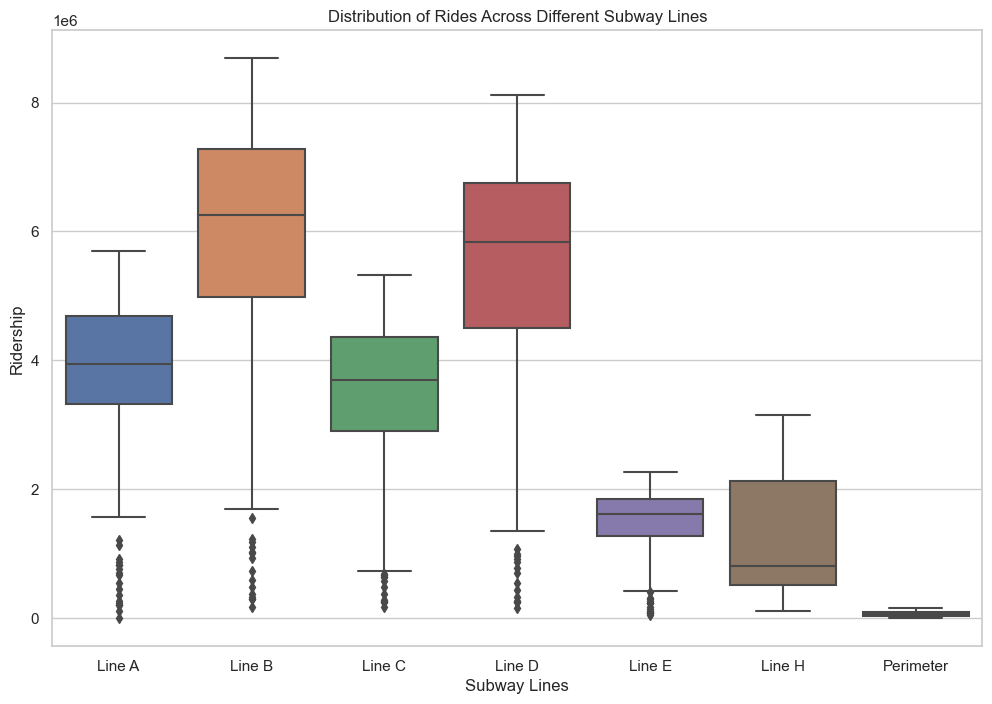

In [117]:

sns.set(style="whitegrid")

# Individual Variable Analysis: Distribution of Rides Across Different Lines
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_SubteBA2[['Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter']])
plt.title('Distribution of Rides Across Different Subway Lines')
plt.ylabel('Ridership')
plt.xlabel('Subway Lines')
plt.show()



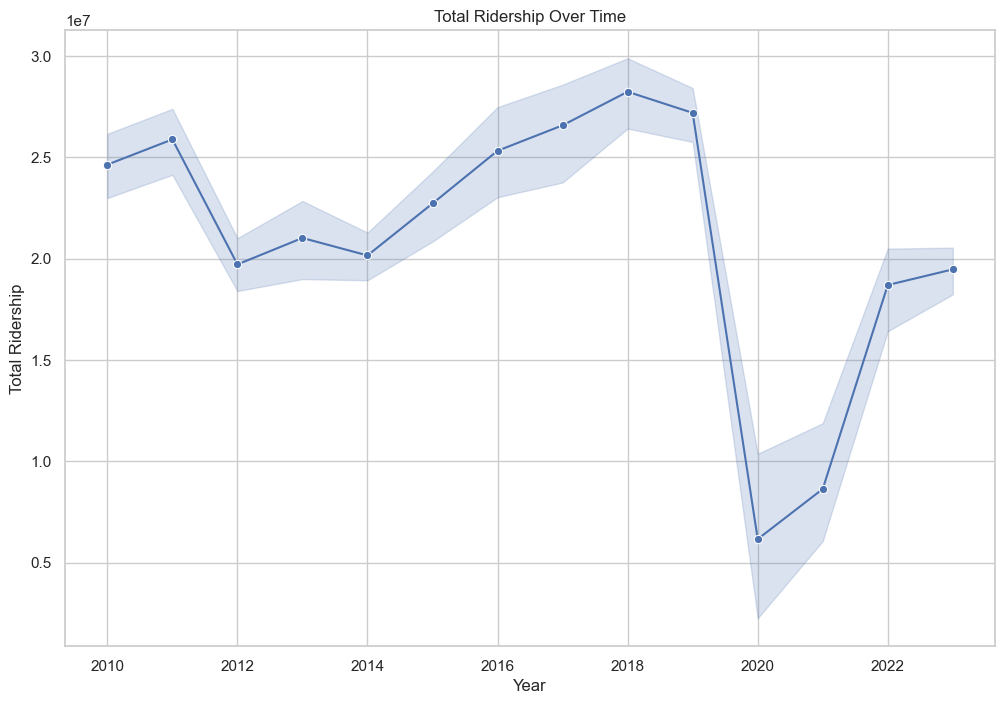

In [118]:
# Time Series Analysis: Total Ridership over the years 2010 - 2023
plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Total', data=df_SubteBA2, marker='o')
plt.title('Total Ridership Over Time')
plt.ylabel('Total Ridership')
plt.xlabel('Year')
plt.show()

#### Further Time Series Analysis: Here I do a more detailed analysis on a monthly basis would be insightful

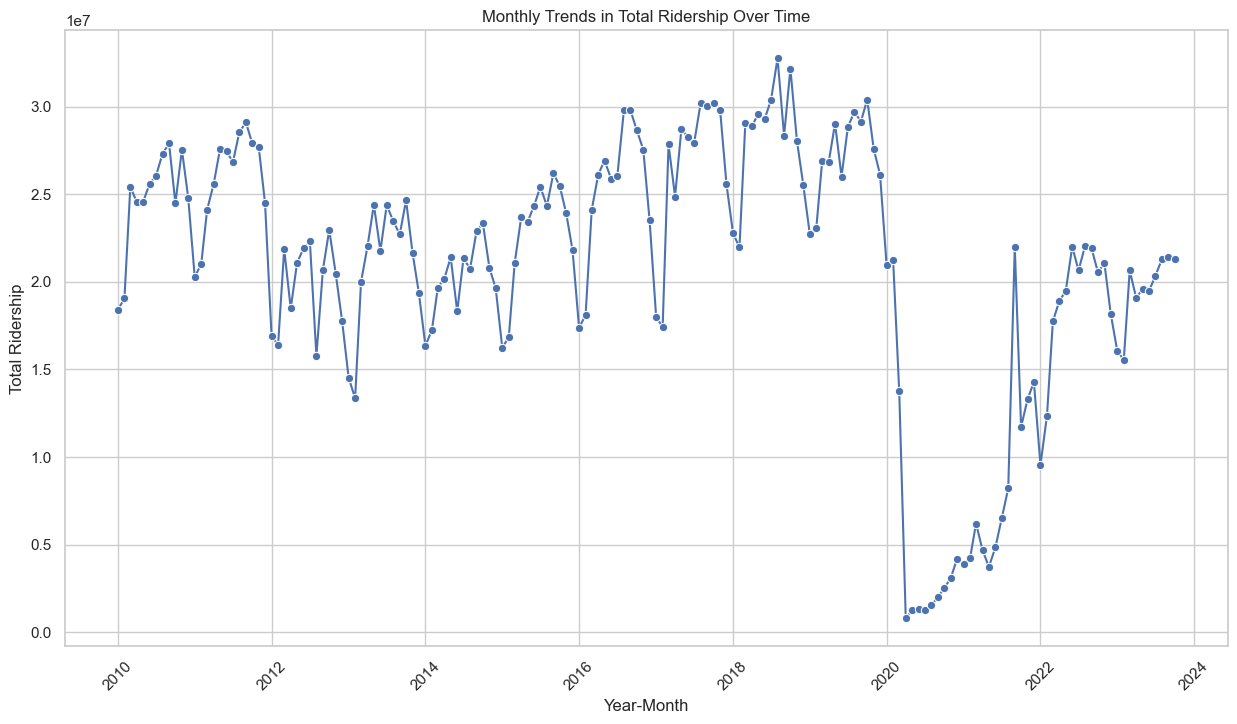

In [111]:
# Here I created a combined year/month column 
df_SubteBA2['YearMonth'] = df_SubteBA2['Year'].astype(str) + '-' + df_SubteBA2['Month']
df_SubteBA2['YearMonth'] = pd.to_datetime(df_SubteBA2['YearMonth'], format='%Y-%B')

# Time Series Analysis: Monthly Trends in Total
plt.figure(figsize=(15, 8))
sns.lineplot(x='YearMonth', y='Total', data=df_SubteBA2, marker='o')
plt.title('Monthly Trends in Total Ridership Over Time')
plt.xticks(rotation=45)
plt.ylabel('Total Ridership')
plt.xlabel('Year-Month')
plt.show()


Time Series Analysis: Monthly Trends in Total 
The line plot shows the monthly trends in total  over time:

There are noticeable fluctuations within each year, suggesting a potential seasonal pattern in ridership.
Some years show significant peaks or troughs, which could be due to various external factors for example (events, weather conditions, operational changes and the most importat in 2020 we see it goes down because of COVID and slowling increasing).

The trend over the entire period can be better understood by observing changes in peak and trough levels across different years.

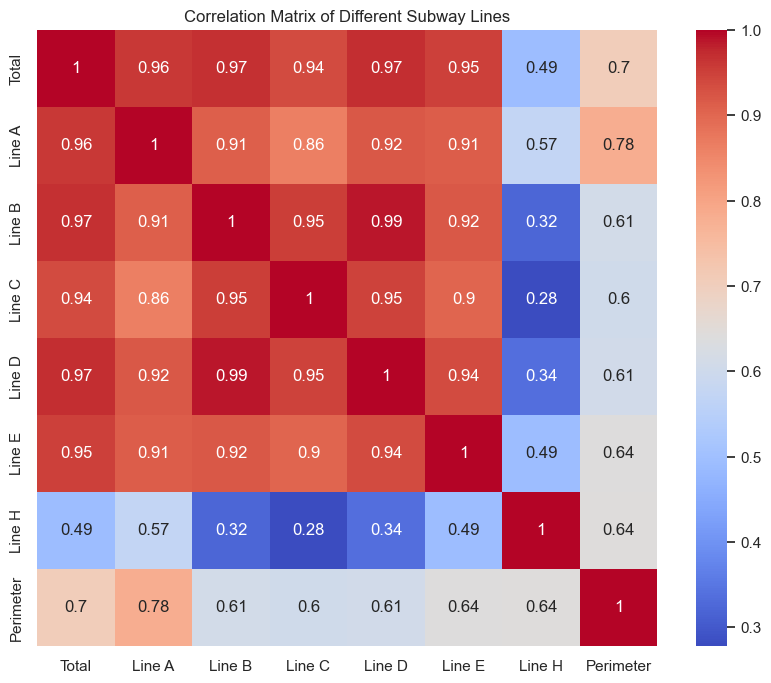

In [112]:
# Correlation Analysis: Correlation between different lines
correlation_matrix = df_SubteBA2[['Total', 'Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter']].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Different Subway Lines')
plt.show()

The heatmap presents the correlation matrix of different subway lines and total ridership:

There is a strong positive correlation between the ridership of different lines, indicating that when one line experiences high ridership, others tend to as well.
The 'Total' ridership is highly correlated with each individual line, showing that the total ridership is a good representation of the overall system usage.
Some lines have stronger correlations with each other, suggesting they might serve interconnected or similarly trafficked areas.

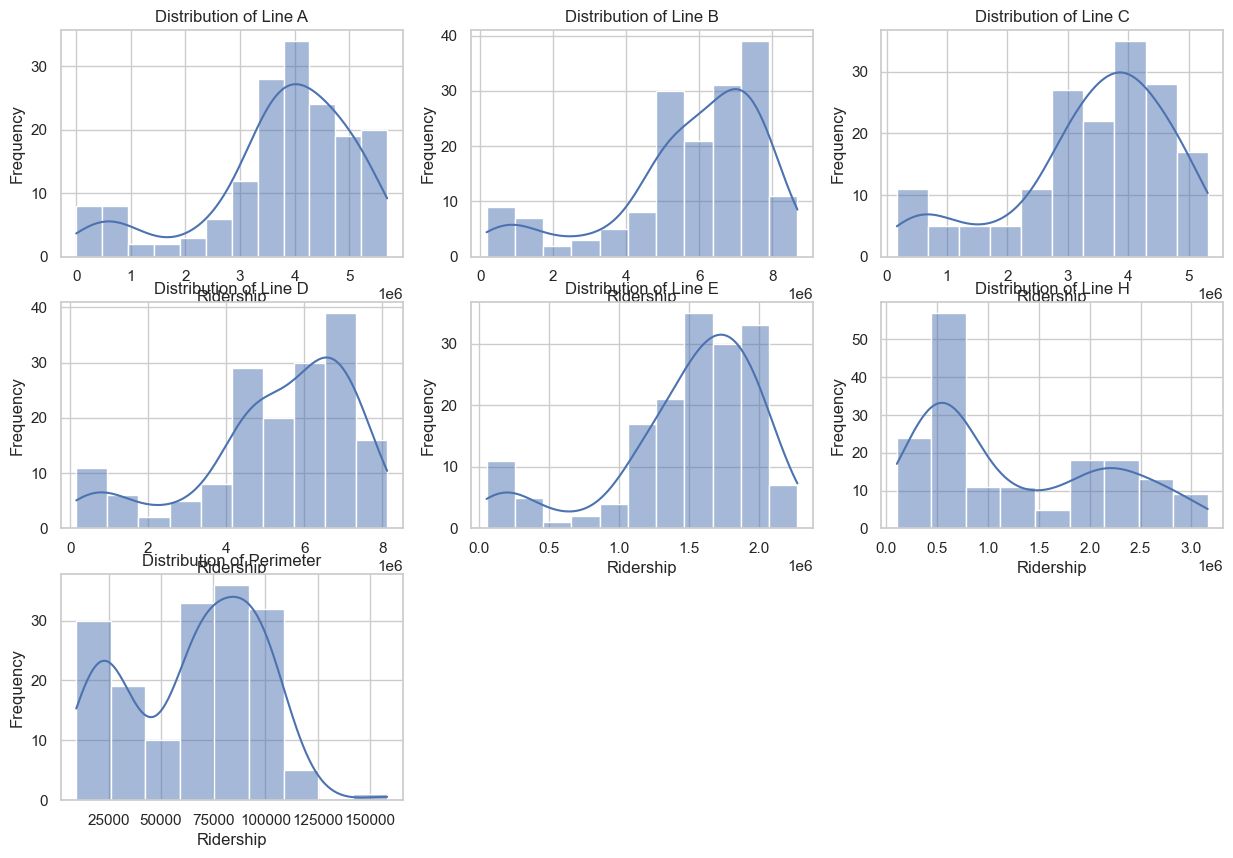

In [127]:
# Histograms for ridership of each line
# Helps to understand the distribution of ridership across different lines
plt.figure(figsize=(15, 10))
for i, column in enumerate(['Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter'], start=1):
    plt.subplot(3, 3, i)
    sns.histplot(df_SubteBA2[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel('Ridership')
    plt.ylabel('Frequency')


Histograms for Each Line:

These histograms show the distribution of ridership for each subway line.
We observe different patterns in ridership across lines, indicating varying usage intensities and possibly different user demographics or purposes

### Confidence interval Subway Buenos Aires

In [135]:
from scipy import stats


# Function to calculate confidence interval for each year
def calculate_yearly_confidence_interval(data, column):
    yearly_data = {}
    for year in data['Year'].unique():
        year_data = data[data['Year'] == year][column]
        mean = np.mean(year_data)
        std_error = stats.sem(year_data)
        confidence_interval = stats.t.interval(0.95, len(year_data) - 1, loc=mean, scale=std_error) #I could aloso used the monthly data
        yearly_data[year] = (mean, confidence_interval)
    return yearly_data

# Calculating mean and confidence interval for each line per year
lines = ['Total','Line A', 'Line B', 'Line C', 'Line D', 'Line E', 'Line H', 'Perimeter']
yearly_ci_results = {line: calculate_yearly_confidence_interval(df_SubteBA2, line) for line in lines}

# Displaying the first line's results as an example 
# I can also display each line as well this is just an example 

yearly_ci_results['Total']



#Reference the code

# https://notebook.community/quantopian/research_public/notebooks/lectures/Confidence_Intervals/notebook
# https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data

{2010: (24644790.083333332, (22729527.0089183, 26560053.157748364)),
 2011: (25888993.416666668, (24058814.25507358, 27719172.578259755)),
 2012: (19720710.416666668, (18119489.875641365, 21321930.95769197)),
 2013: (21025908.916666668, (18667959.50355647, 23383858.329776864)),
 2014: (20163840.166666668, (18832913.83393157, 21494766.499401767)),
 2015: (22726934.166666668, (20671040.97476638, 24782827.358566955)),
 2016: (25328661.166666668, (22757158.794566788, 27900163.538766548)),
 2017: (26584678.666666668, (23734433.51666491, 29434923.816668425)),
 2018: (28241939.0, (26135417.639385294, 30348460.360614706)),
 2019: (27199469.833333332, (25638920.93227301, 28760018.734393653)),
 2020: (6164766.166666667, (1205517.4365157187, 11124014.896817615)),
 2021: (8639109.375, (5065208.769276945, 12213009.980723055)),
 2022: (18703973.958333332, (16198268.287773594, 21209679.62889307)),
 2023: (19475800.5, (17970527.248120494, 20981073.751879506))}


These confidence intervals provide an estimated range for the true average ridership of the TOTAL for each year.(That means all the lines)
There is a significant drop in ridership in 2020, likely due to the global COVID 19 pandemic, and a partial recovery in the subsequent years.

Similar calculations can be made for other subway lines to compare trends.
Further analysis could explore the reasons behind the fluctuations in ridership, such as external events or changes in the subway system.
This analysis helps in understanding the variability and trends in ridership over different years, providing a more detailed perspective on how subway usage has evolved.

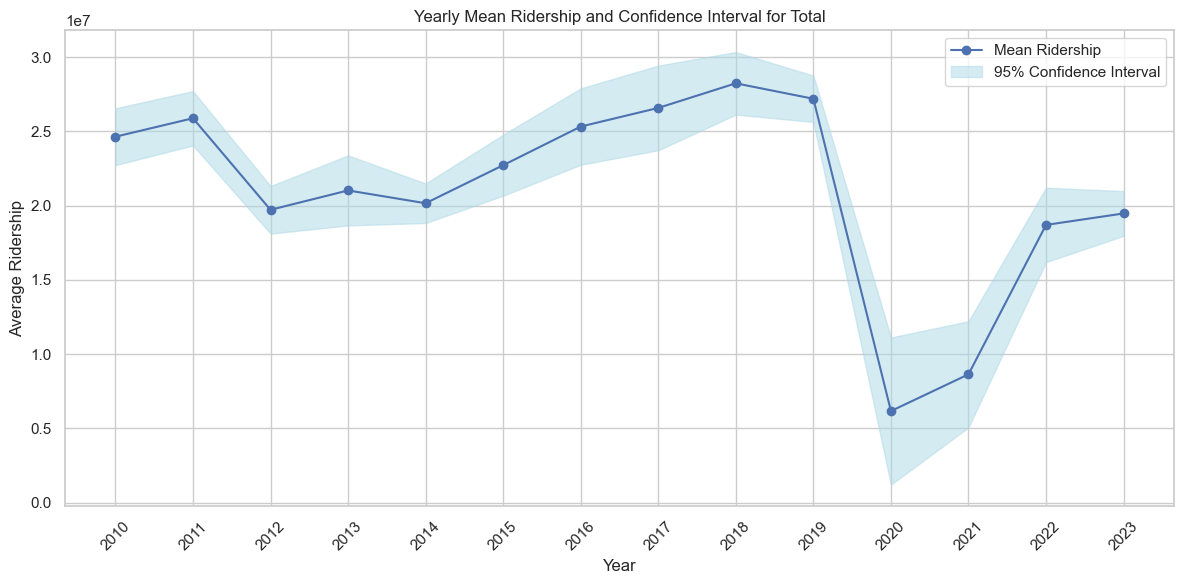

In [136]:
# Plotting the yearly confidence intervals for the total 
years = list(yearly_ci_results['Total'].keys())
means = [yearly_ci_results['Total'][year][0] for year in years]
ci_lower = [yearly_ci_results['Total'][year][1][0] for year in years]
ci_upper = [yearly_ci_results['Total'][year][1][1] for year in years]

plt.figure(figsize=(12, 6))
plt.plot(years, means, marker='o', color='b', label='Mean Ridership')
plt.fill_between(years, ci_lower, ci_upper, color='lightblue', alpha=0.5, label='95% Confidence Interval')
plt.title('Yearly Mean Ridership and Confidence Interval for Total')
plt.xlabel('Year')
plt.ylabel('Average Ridership')
plt.legend()
plt.grid(True)
plt.xticks(years, rotation=45)
plt.tight_layout()
plt.show()

### Tests 

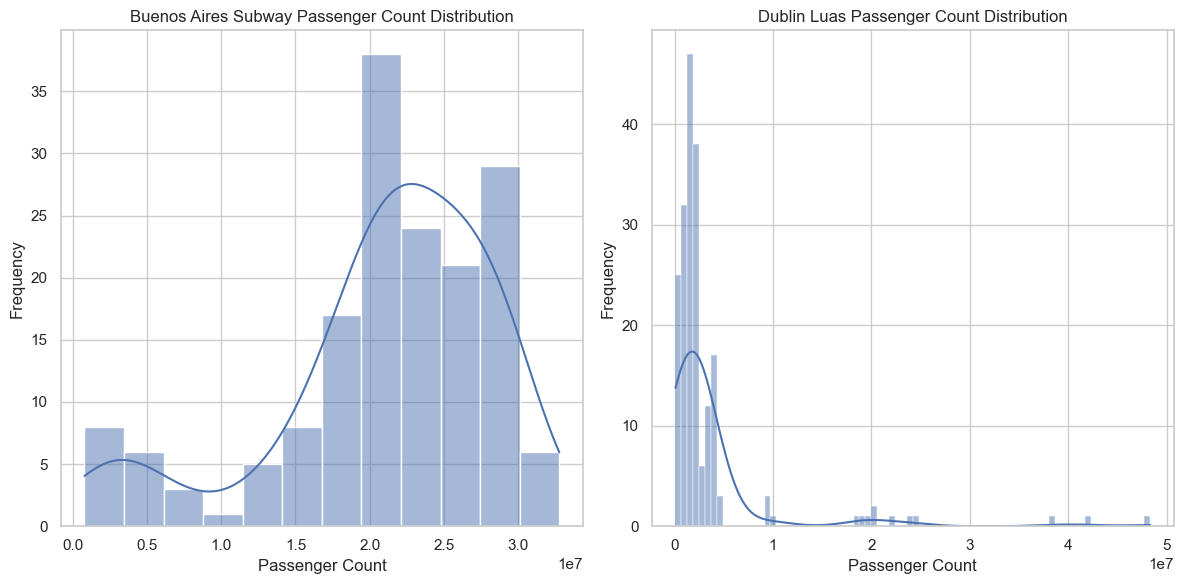

In [152]:
# Plotting histograms
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_SubteBA2['Total'], kde=True)
plt.title('Buenos Aires Subway Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df_DublinLuas['VALUE'], kde=True)
plt.title('Dublin Luas Passenger Count Distribution')
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [150]:

# One-sample t-test
# Hypothesis: The mean ridership in 2010 for Line A is different from 4 million.
line_a_2010 = df_SubteBA2[(df_SubteBA2['Year'] == 2010)]['Line A']
t_test_1_sample = stats.ttest_1samp(line_a_2010, 4000000)

t_test_1_sample

TtestResult(statistic=1.7182391137949133, pvalue=0.11373372786358518, df=11)

In [147]:
# Paired t-test
# Hypothesis: There is a significant difference in ridership between Line A and Line B in 2010.
line_b_2010 = df_SubteBA2[(df_SubteBA2['Year'] == 2010)]['Line B']
t_test_paired = stats.ttest_rel(line_a_2010, line_b_2010)

t_test_paired

TtestResult(statistic=-24.003477726797463, pvalue=7.487358411582701e-11, df=11)

In [148]:
# Analysis of Variance (ANOVA)
# Hypothesis: The mean ridership among Line A, Line B, and Line C are equal.
line_c_2010 = df_SubteBA2[(df_SubteBA2['Year'] == 2010)]['Line C']
anova_test = stats.f_oneway(line_a_2010, line_b_2010, line_c_2010)

anova_test


F_onewayResult(statistic=67.74099535523548, pvalue=2.0765744223551514e-12)

In [145]:
# Wilcoxon test
# Hypothesis: There is a significant difference in ridership between Line A and Line B in 2010.
# Note: Wilcoxon test is used for non-parametric data. Here it's assumed that the normality assumption is violated.
wilcoxon_test = stats.wilcoxon(line_a_2010, line_b_2010)

wilcoxon_test

WilcoxonResult(statistic=0.0, pvalue=0.00048828125)

In [146]:
# Chi-squared test
# Hypothesis: There is an association between 'Year' and 'Total' ridership.
# Note: We create a contingency table for this test.
contingency_table = pd.crosstab(df_SubteBA2['Year'], df_SubteBA2['Total'] > median_total)
chi_squared_test = stats.chi2_contingency(contingency_table)

chi_squared_test

Chi2ContingencyResult(statistic=95.98983739837398, pvalue=9.88617668647293e-15, dof=13, expected_freq=array([[6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [6.07228916, 5.92771084],
       [5.06024096, 4.93975904]]))